In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import pandas_profiling

In [3]:
df = pd.read_csv("final_aggregated_dataset.csv")
df.head()

,address,lifetime,most_active_day,activity_days,in_vs_out,num_in,num_out,median_delay,mean_delay,max_delay,min_delay,total_sent,total_recv,avg_out,avg_in,max_diff,addresses_in_out,class
0,15fcEUmKXBiScw2CDwKEre2YE8brvWPxVA,2051098,5,15,33.000000,33,1,165.0,165.00,165,165,0.100000,7.450000,0.100000,0.225758,7.450000,0,0
1,121E9w1ogmjowDbJmkmCuqqQGztJteR78A,76904856,4,87,2.793103,81,29,29040.0,60882.00,278857,2981,141.577703,141.577703,4.881990,1.747873,141.577703,0,0
2,12Hd6yd28NXoLuBYwqfncv3J7xXQnKKhGb,178822511,8,118,39.600000,198,5,8595.0,8595.00,8595,8595,10.053716,30.876715,2.010743,0.155943,30.876715,0,0
3,166uYUb7ogk1xyxSSYQzdXRefdbYJaMTjs,934241,8,10,7.750000,31,4,5365.0,8232.50,22200,0,106.170000,106.170000,26.542500,3.424839,106.170000,0,0
4,16Zf5yBa2BhitYZMdENxAfkPs244YTG7y4,706251,13,8,1.285714,18,14,2812.0,41064.25,259088,647,330.770000,330.770000,23.626429,18.376111,330.770000,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2299 entries, 0 to 2298
Data columns (total 18 columns):
address             2299 non-null object
lifetime            2299 non-null int64
most_active_day     2299 non-null int64
activity_days       2299 non-null int64
in_vs_out           2299 non-null float64
num_in              2299 non-null int64
num_out             2299 non-null int64
median_delay        2299 non-null float64
mean_delay          2299 non-null float64
max_delay           2299 non-null int64
min_delay           2299 non-null int64
total_sent          2299 non-null float64
total_recv          2299 non-null float64
avg_out             2299 non-null float64
avg_in              2299 non-null float64
max_diff            2299 non-null float64
addresses_in_out    2299 non-null int64
class               2299 non-null int64
dtypes: float64(8), int64(9), object(1)
memory usage: 323.4+ KB


In [5]:
df["class"].value_counts()

0    2222
1      77
Name: class, dtype: int64

In [7]:
profile = pandas_profiling.ProfileReport(df.select_dtypes(exclude=['object']))
profile.to_file(output_file="profile.html")

In [8]:
X = df.drop(columns={"address", "class", "min_delay","mean_delay", "median_delay"})
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0, stratify=y)

In [9]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

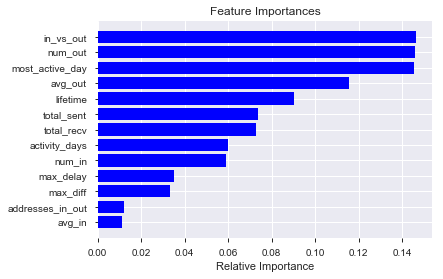

In [10]:
features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()